In [1]:
using Distributions

In [2]:
using Plots
lW = 3;

### Explore relation between parameters and moments of logNormal distribution

In [85]:
# Parameters
m = 3.
v = 2.

# Define distribution
x = LogNormal(m, sqrt(v))

LogNormal{Float64}(μ=3.0, σ=1.4142135623730951)

In [86]:
# Extract E[x] and V[x]
Ex = mean(x)
Vx = var(x)

# Transform expected value and variance to parameters
m_hat = log(Ex^2/sqrt(Vx + Ex^2))
v_hat = log(Vx/Ex^2 + 1)

# Report absolute difference between transformed moments and parameters
println(abs(m - m_hat))
println(abs(v - v_hat))

4.440892098500626e-16
4.440892098500626e-16


In [87]:
# Transform parameters to expected value and variance
Ex_hat = exp(m + v/2)
Vx_hat = exp(2*m + v)*(exp(v)-1)

# Report absolute difference between transformed moments and parameters
println(abs(Ex - Ex_hat))
println(abs(Vx - Vx_hat))

0.0
1.0913936421275139e-11


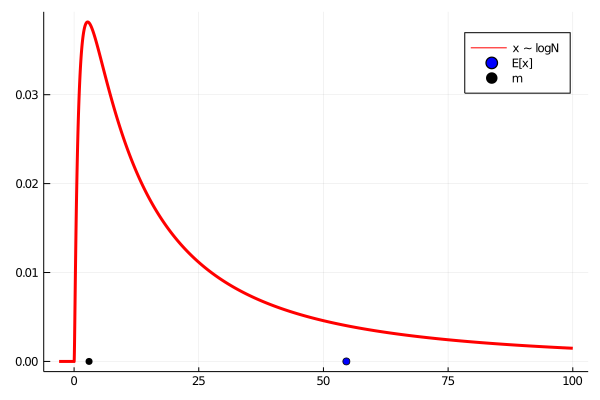

In [88]:
# Plot distributions
domain = -3:0.01:100
plot(domain, pdf.(x, domain), color="red", linewidth=lW, label="x ~ logN")
scatter!([Ex], [0.], color="blue", label="E[x]")
scatter!([m], [0.], color="black", label="m")

## Approximate Gamma with a log-Normal distribution

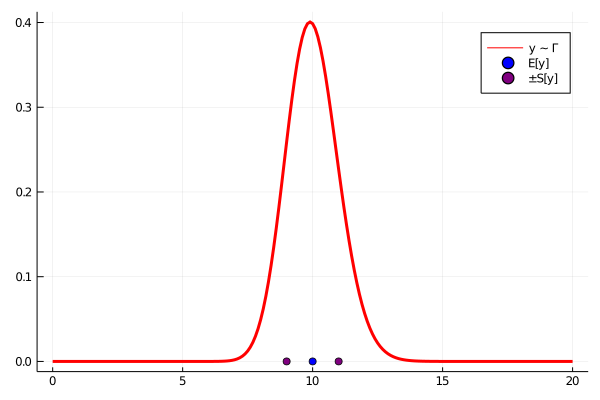

In [145]:
# Parameters of gamma
a = 100.
b = 10.

# Define distribution
y = Gamma(a,1/b)

# Extract expected value and variance of y
Ey = mean(y)
Sy = std(y)
Vy = var(y)

# Plot over domain
domain = range(0, stop=(2*a/b), step=0.1)
plot(domain, pdf.(y, domain), color="red", linewidth=lW, label="y ~ Γ")
scatter!([Ey], [0.], color="blue", label="E[y]")
scatter!([Ey-Sy, Ey+Sy], [0., 0.], color="purple", label="±S[y]")

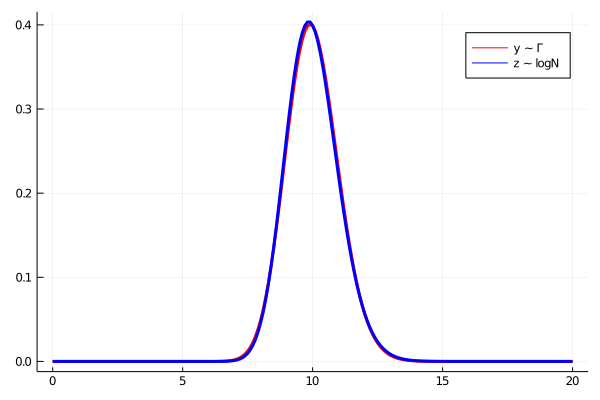

In [149]:
# Moment matching between log-Normal and Gamma distribution
Ex = Ey
Vx = Vy

# Map expected value and variance of log-Normal to parameters
m_hat = log(Ex^2/sqrt(Vx + Ex^2))
v_hat = log(Vx/Ex^2 + 1)

# Define distribution
z = LogNormal(m_hat, sqrt(v_hat))

# Plot distributions
domain = range(0, stop=20, step=0.1)
plot(domain, pdf.(y, domain), color="red", linewidth=lW, label="y ~ Γ")
plot!(domain, pdf.(z, domain), color="blue", linewidth=lW, label="z ~ logN")


In [150]:
println("Mean = "*string(mean(z)))
println("Mode = "*string(mode(z)))

Mean = 9.999999999999998
Mode = 9.851853368415735
